# 一维Sod激波管

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/zh_cn/cfd/mindspore_sod_tube.ipynb)&emsp;[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/zh_cn/cfd/mindspore_sod_tube.py)&emsp;[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.png)](https://gitee.com/mindspore/docs/blob/master/docs/mindflow/docs/source_zh_cn/cfd/sod_tube.ipynb)

本案例要求**MindSpore版本 >= 2.0.0**调用如下接口: *mindspore.jit，mindspore.jit_class*。

激波管问题是检验计算流体代码准确性的常见问题。这个案例为一个一维黎曼问题，即理想气体在左右端不同条件下的发展问题。

## 问题描述

Sod激波管问题的定义为:

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ u(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{\rho}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

其中，对理想气体， $\gamma = 1.4$ ，初始条件为：

$$
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x<0.5} = \left(\begin{matrix} 1.0 \\ 0.0 \\ 1.0 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x>0.5} = \left(\begin{matrix} 0.125 \\ 0.0 \\ 0.1 \\\end{matrix}\right)
$$

在激波管两端，施加第二类边界条件。

本案例中`src`包可以在[src](https://gitee.com/mindspore/mindscience/tree/master/MindFlow/applications/cfd/sod/src)下载。

In [1]:
from mindspore import context
from mindflow import load_yaml_config, vis_1d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import sod_ic_1d

context.set_context(device_target="GPU", device_id=3)

## 定义Simulator和RunTime

网格、材料、仿真时间、边界条件和数值方法的设置在文件[numeric.yaml](https://gitee.com/mindspore/mindscience/blob/master/MindFlow/applications/cfd/sod/numeric.yaml)中。

In [2]:
config = load_yaml_config('numeric.yaml')
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## 初始条件

根据网格坐标确定初始条件。

In [3]:
mesh_x, _, _ = simulator.mesh_info.mesh_xyz()
pri_var = sod_ic_1d(mesh_x)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## 执行仿真

随时间推进执行仿真。

In [4]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.007606
current time = 0.007606, time step = 0.005488
current time = 0.013094, time step = 0.004744
current time = 0.017838, time step = 0.004501
current time = 0.022339, time step = 0.004338
current time = 0.026678, time step = 0.004293
current time = 0.030971, time step = 0.004268
current time = 0.035239, time step = 0.004198
current time = 0.039436, time step = 0.004157
current time = 0.043593, time step = 0.004150
current time = 0.047742, time step = 0.004075
current time = 0.051818, time step = 0.004087
current time = 0.055905, time step = 0.004056
current time = 0.059962, time step = 0.004031
current time = 0.063993, time step = 0.004021
current time = 0.068014, time step = 0.004048
current time = 0.072062, time step = 0.004039
current time = 0.076101, time step = 0.004016
current time = 0.080117, time step = 0.004049
current time = 0.084166, time step = 0.004053
current time = 0.088218, time step = 0.004045
current time = 0.092264, time step

## Post Processing

您可以对密度、压力、速度进行可视化。

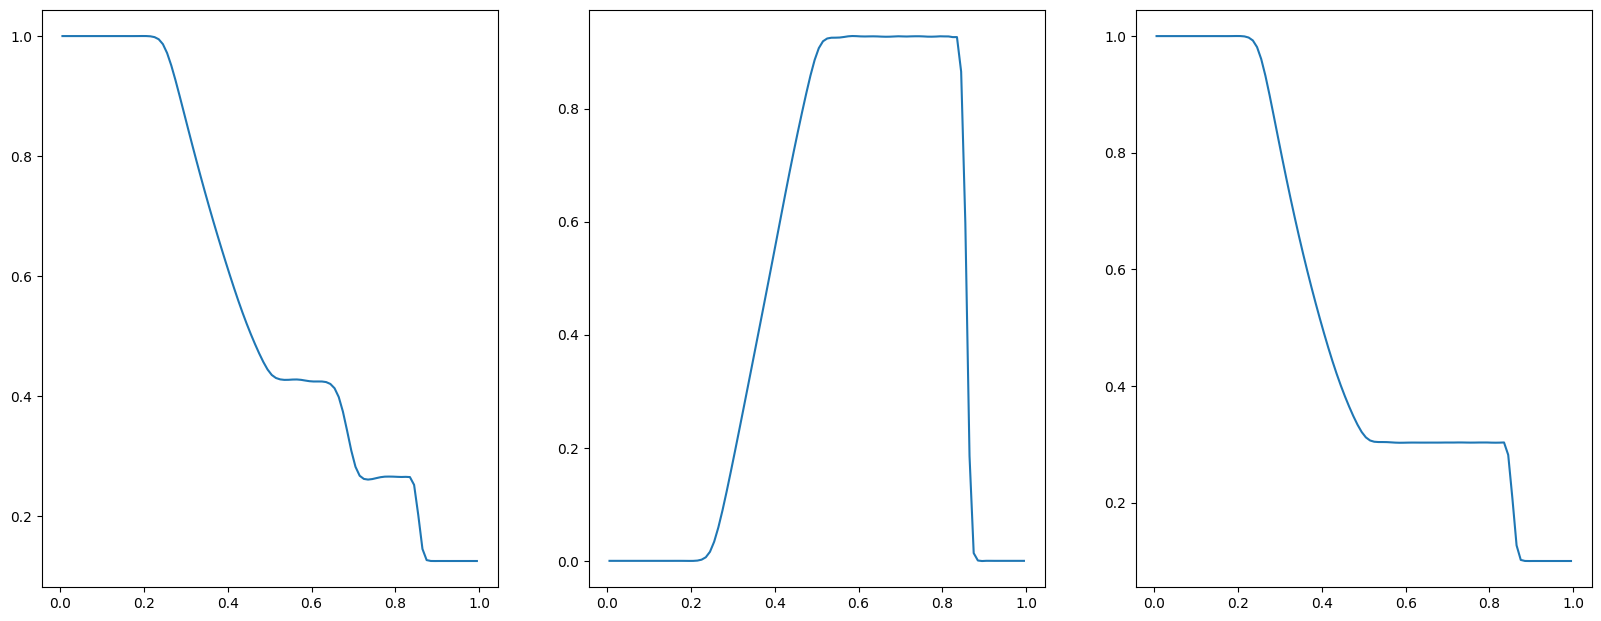

In [5]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_1d(pri_var, 'sod.jpg')